<a href="https://colab.research.google.com/github/AbhayKaushik-ml/CODSOFT/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Necesaary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

## 2) Loading Dataset

In [6]:
train_df = pd.read_csv("fraudTrain.csv", engine='python', on_bad_lines='skip')
test_df = pd.read_csv("fraudTest.csv", engine='python', on_bad_lines='skip')


# 3) Data overview and pre processing

In [17]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139857 entries, 0 to 139856
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             139857 non-null  int64  
 1   trans_date_trans_time  139857 non-null  object 
 2   cc_num                 139857 non-null  int64  
 3   merchant               139856 non-null  object 
 4   category               139856 non-null  object 
 5   amt                    139856 non-null  float64
 6   first                  139856 non-null  object 
 7   last                   139856 non-null  object 
 8   gender                 139856 non-null  object 
 9   street                 139856 non-null  object 
 10  city                   139856 non-null  object 
 11  state                  139856 non-null  object 
 12  zip                    139856 non-null  float64
 13  lat                    139856 non-null  float64
 14  long                   139856 non-nu

In [20]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,139857.000000,1.398570e+05,139856.000000,139856.000000,139856.000000,139856.000000,1.398560e+05,1.398560e+05,139856.000000,139856.000000,139856.000000
mean,69928.000000,4.177092e+17,71.912952,48738.637020,38.539223,-90.183871,8.977525e+04,1.328858e+09,38.540819,-90.184373,0.009367
std,40373.382636,1.309175e+18,154.728954,26913.062235,5.066222,13.748888,3.030926e+05,1.949790e+06,5.099267,13.760204,0.096328
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,34964.000000,1.800365e+14,9.680000,26041.000000,34.668900,-96.790900,7.430000e+02,1.327159e+09,34.752617,-96.875541,0.000000
50%,69928.000000,3.519607e+15,48.000000,48174.000000,39.371600,-87.461600,2.456000e+03,1.328936e+09,39.372020,-87.411739,0.000000
75%,104892.000000,4.642255e+15,83.850000,72011.000000,41.894800,-80.128400,2.112500e+04,1.330676e+09,41.949648,-80.184569,0.000000
max,139856.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.331988e+09,66.659242,-66.967742,1.000000


In [21]:
train_df.shape

(139857, 23)

In [24]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
train_df.duplicated().sum()

0

In [27]:
encoder = LabelEncoder()
train_df["merchant"] = encoder.fit_transform(train_df["merchant"])
train_df["category"] = encoder.fit_transform(train_df["category"])
train_df["gender"] = encoder.fit_transform(train_df["gender"])
train_df["job"] = encoder.fit_transform(train_df["job"])

In [29]:
train_df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,359,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,415,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,297,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,318,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,112,1.325376e+09,38.674999,-78.632459,0.0


# 4) Plotting Data

<ipython-input-41-c061f6f44800>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=train_df, palette=sns.color_palette("coolwarm", 2), saturation=0.85)


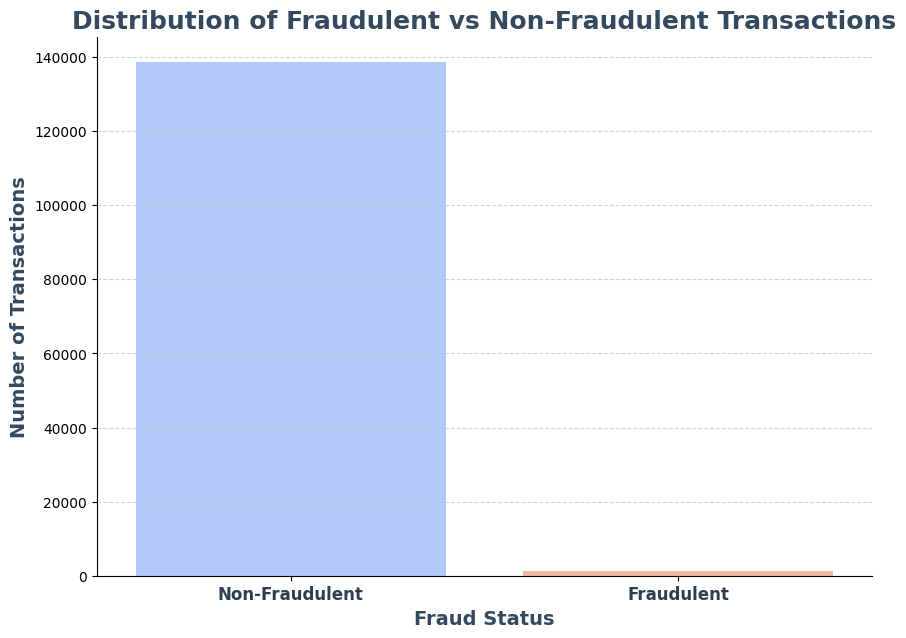

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.countplot(x='is_fraud', data=train_df, palette=sns.color_palette("coolwarm", 2), saturation=0.85)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions', fontsize=18, fontweight='bold', color='#34495E')
plt.xlabel('Fraud Status', fontsize=14, fontweight='bold', color='#34495E')
plt.ylabel('Number of Transactions', fontsize=14, fontweight='bold', color='#34495E')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], fontsize=12, fontweight='bold', color='#2C3E50')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#BDC3C7')
sns.despine(top=True, right=True)
plt.show()


In [31]:
x = train_df.drop(columns=["is_fraud"], inplace = False)
y = train_df["is_fraud"]

# 5) Splitting data and training the model

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=40)

In [35]:
x_train_cleaned = x_train.dropna()
y_train_cleaned = y_train[x_train_cleaned.index]  # Keep corresponding labels
x_test_cleaned = x_test.dropna()
y_test_cleaned = y_test[x_test_cleaned.index]

In [36]:
model = RandomForestClassifier()
model.fit(x_train_cleaned, y_train_cleaned)

RandomForestClassifier()

In [37]:
model.score(x_train_cleaned,y_train_cleaned)

0.999989785286727

In [39]:
y_predict = model.predict(x_test_cleaned)
y_predict
Accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Percentage: {:.2f}%".format(Accuracy * 100))

Accuracy Percentage: 99.62%


# 6) Plotting Random Forest Accuracy graph

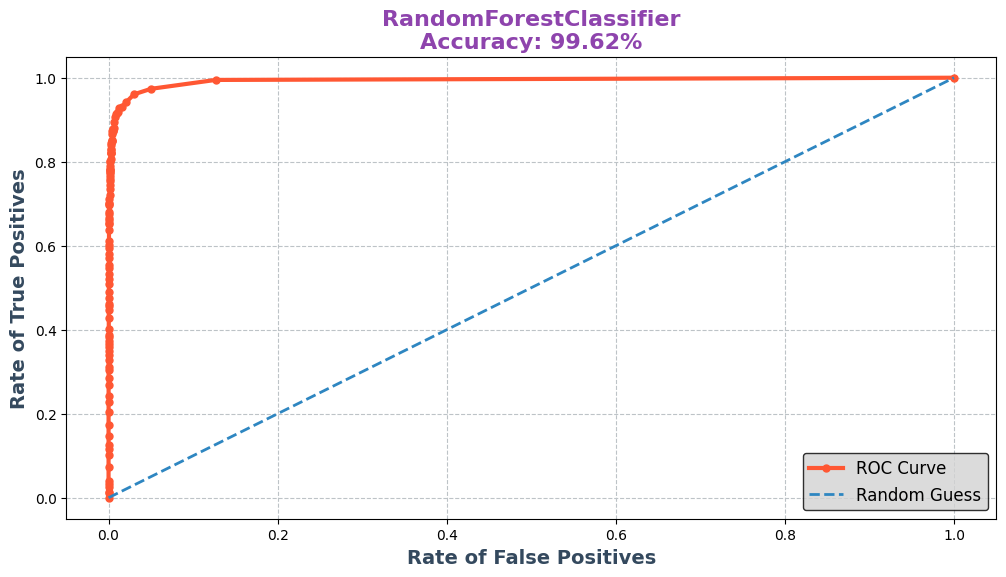

In [40]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

import matplotlib.pyplot as plt

# Enhanced Plot
plt.figure(figsize=(12, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='#FF5733', lw=3, linestyle='-', marker='o', markersize=5, label='ROC Curve')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='#2E86C1', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('Rate of False Positives', fontsize=14, fontweight='bold', color='#34495E')
plt.ylabel('Rate of True Positives', fontsize=14, fontweight='bold', color='#34495E')

plt.title('RandomForestClassifier\nAccuracy: {:.2f}%'.format(Accuracy * 100), fontsize=16, fontweight='bold', color='#8E44AD')

plt.legend(loc='lower right', fontsize=12, frameon=True, facecolor='lightgrey', edgecolor='black')

plt.grid(True, linestyle='--', color='#BDC3C7')
plt.show()
